# Clean and Analyze Employee Exit Surveys

In this project, we'll work with exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia.

Our main goal in this project is to answer the following questions:
- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?

## Read in and Oberserve Datasets

In [336]:
import pandas as pd
import numpy as np
dete_survey=pd.read_csv('dete_survey.csv', na_values='Not Stated')
tafe_survey=pd.read_csv('tafe_survey.csv')

In [337]:
dete_survey.info()
dete_survey.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   822 non-null    int64  
 1   SeparationType                       822 non-null    object 
 2   Cease Date                           788 non-null    object 
 3   DETE Start Date                      749 non-null    float64
 4   Role Start Date                      724 non-null    float64
 5   Position                             817 non-null    object 
 6   Classification                       455 non-null    object 
 7   Region                               717 non-null    object 
 8   Business Unit                        126 non-null    object 
 9   Employment Status                    817 non-null    object 
 10  Career move to public sector         822 non-null    bool   
 11  Career move to private sector   

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [338]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

In [339]:
tafe_survey.head()

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.340000e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 ?30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.340000e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.340000e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.340000e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
4,6.340000e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,Yes,Yes,Yes,Yes,Male,41 ?45,Permanent Full-time,Teacher (including LVT),3-4,3-4


### DETE Survey
- ID: An id used to identify the participant of the survey
- SeparationType: The reason why the person's employment ended
- Cease Date: The year or month the person's employment ended
- DETE Start Date: The year the person began employment with the DETE

### TAFE Survey
- Record ID: An id used to identify the participant of the survey
- Reason for ceasing employment: The reason why the person's employment ended
- LengthofServiceOverall. Overall Length of Service at Institute (in years): The length of the person's employment (in years)

## Data Cleaning

From our early oberservation, we found that:
- The dete_survey dataframe contains 'Not Stated' values that indicate values are missing, but they aren't represented as NaN. 
- Both the dete_survey and tafe_survey dataframes contain many columns that we don't need to complete our analysis. 
- Each dataframe contains many of the same columns, but the column names are different.
- There are multiple columns/answers that indicate an employee resigned because they were dissatisfied.

### Step1: Dropping Unnecessary Columns

In [340]:
dete_survey_updated=dete_survey.drop(dete_survey.columns[28:49], axis=1)
tafe_survey_updated=tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

### Step2: Renameing Columns
To standardizing the names of data columns in both of the two files

In [341]:
dete_survey_updated.columns=dete_survey_updated.columns.str.lower().str.replace(' ', '_').str.strip()
print(dete_survey_updated.columns)

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')


In [342]:
tafe_survey_updated.rename({'Record ID': 'id', 
                            'CESSATION YEAR': 'cease_date', 
                            'Reason for ceasing employment': 'separationtype', 
                            'Gender. What is your Gender?': 'gender', 
                            'CurrentAge. Current Age': 'age', 
                            'Employment Type. Employment Type': 'employment_status', 
                            'Classification. Classification': 'position', 
                            'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service', 
                            'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}, 
                           axis=1, inplace=True)

In [343]:
dete_survey_updated.head()

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [344]:
tafe_survey_updated.head()

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.340000e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 ?30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.340000e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.340000e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.340000e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.340000e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 ?45,Permanent Full-time,Teacher (including LVT),3-4,3-4


### Step3: Selecting the Data Relevant to People Who Resigned

In [345]:
dete_survey_updated['separationtype'].value_counts()

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [346]:
tafe_survey_updated['separationtype'].value_counts()

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: separationtype, dtype: int64

In [347]:
dete_resignations=dete_survey_updated.copy()[(dete_survey_updated['separationtype']=='Resignation-Other reasons') | 
                                             (dete_survey_updated['separationtype']=='Resignation-Other employer') | 
                                             (dete_survey_updated['separationtype']=='Resignation-Move overseas/interstate')]
tafe_resignations=tafe_survey_updated.copy()[tafe_survey_updated['separationtype']=='Resignation']

## Calculate Their Working Period

In [348]:
dete_resignations['cease_date'].value_counts()
dete_resignations['cease_date']=dete_resignations['cease_date'].str.extract(r"([1-2][0-9]{3})").astype(float)

In [349]:
dete_resignations['dete_start_date'].value_counts(ascending=True)
### Given that most people in this field start working in their 20s, 
### it's also unlikely that the dete_start_date was before the year 1940.

1971.0     1
1973.0     1
1982.0     1
1987.0     1
1977.0     1
1963.0     1
1972.0     1
1984.0     1
1975.0     1
1976.0     2
1983.0     2
1974.0     2
2001.0     3
1986.0     3
1985.0     3
1995.0     4
1991.0     4
1988.0     4
1989.0     4
1993.0     5
1990.0     5
1997.0     5
1980.0     5
2002.0     6
1994.0     6
1992.0     6
1998.0     6
1996.0     6
2003.0     6
1999.0     8
2000.0     9
2013.0    10
2006.0    13
2009.0    13
2004.0    14
2005.0    15
2010.0    17
2012.0    21
2007.0    21
2008.0    22
2011.0    24
Name: dete_start_date, dtype: int64

In [350]:
tafe_resignations['cease_date'].value_counts()

2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: cease_date, dtype: int64

In [351]:
dete_resignations['institute_service']=dete_resignations['cease_date']-dete_resignations['dete_start_date']

## Who resign because of job dissatisfaction?

In [352]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [353]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()

-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [354]:
def update_vals(va):
    if va == 'NaN':
        return np.nan
    elif va == '-':
        return False
    else:
        return True
series_factor=['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']
a=tafe_resignations[series_factor].applymap(update_vals)
tafe_resignations['dissatisfied']=a.any(axis=1, skipna=False)
tafe_resignations_up=tafe_resignations.copy()

In [355]:
series_factor=['job_dissatisfaction', 'dissatisfaction_with_the_department', 
               'physical_work_environment', 'lack_of_recognition', 'lack_of_job_security', 
               'work_location', 'employment_conditions', 'work_life_balance', 'workload']
a=dete_resignations[series_factor].applymap(update_vals)
dete_resignations['dissatisfied']=a.any(axis=1, skipna=False)
dete_resignations_up=dete_resignations.copy()

## Data Aggregation

In [356]:
dete_resignations_up['institute']='DETE'
tafe_resignations_up['institute']='TAFE'

In [357]:
combined=pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True)

### Data Cleaning: if any row has too much NAN, we drop it.
combined.dropna(axis=1, thresh=500, inplace=True)   #要記得寫 axis=1 , inplace=True
combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 651 non-null    float64
 1   separationtype     651 non-null    object 
 2   cease_date         635 non-null    float64
 3   position           598 non-null    object 
 4   employment_status  597 non-null    object 
 5   gender             592 non-null    object 
 6   age                596 non-null    object 
 7   institute_service  563 non-null    object 
 8   dissatisfied       651 non-null    bool   
 9   institute          651 non-null    object 
dtypes: bool(1), float64(2), object(7)
memory usage: 46.5+ KB


In [365]:
### Standarize employee's length of service

def year_recognize(ele):
    cat1='New'  #Less than 3 years at a company
    cat2='Experienced'  #3-6 years at a company
    cat3='Established'  #7-10 years at a company
    cat4='Veteran'  #11 or more years at a company
    
    if type(ele)== 'NAN':
        return np.nan
    
    elif type(ele)== str:
        if ele== 'Less than 1 year':
            return cat1
        elif ele=='1-2':
            return cat1
        elif ele=='3-4':
            return cat2
        elif ele=='5-6':
            return cat2
        elif ele=='7-10':
            return cat3
        else:
            return cat4
    elif type(ele)== float:
        if ele<3:
            return cat1
        elif (ele<7) & (ele>=3):
            return cat2
        elif (ele<11) & (ele>7):
            return cat3
        else:
            return cat4
combined['service_cat']=combined['institute_service'].apply(year_recognize)
combined['service_cat'].value_counts()

Veteran        237
New            193
Experienced    172
Established     49
Name: service_cat, dtype: int64

## The Relation between Length of Service and Job Dissatisfication

In [364]:
combined['dissatisfied'].value_counts()
final=combined.pivot_table('dissatisfied', 'service_cat')
print(final)

             dissatisfied
service_cat              
Established      0.714286
Experienced      0.581395
New              0.476684
Veteran          0.772152


<AxesSubplot:ylabel='service_cat'>

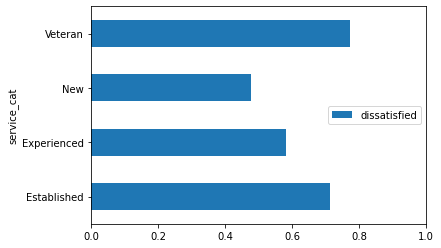

In [363]:
import matplotlib.pyplot as plt
%matplotlib inline
final.plot(kind='barh', xlim=[0, 1.0])

## Conclusion
People who work longer are actually more dissatisfied with their job.